In [1]:
!pip install seaborn -q


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Andrew\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

results_path = 'results.csv'

if not os.path.exists(results_path):
    print("Could not find result file")
else:
    df = pd.read_csv(results_path)

all_datasets = ['ASSIST09', 'NEUR20', 'JUNYI15', 'ASSIST12']
all_models = ['IRT', 'NCDM', 'KaNCD', 'CAKE']
all_runTypes = ['basic', 'sampled', 'undersampleEven', 'undersampleCorrect', 'undersampleIncorrect']

df = df[df['runType'].isin(all_runTypes)]

df['model'] = pd.Categorical(df['model'], categories=all_models, ordered=True)
df['dataset'] = pd.Categorical(df['dataset'], categories=all_datasets, ordered=True)
df['runType'] = pd.Categorical(df['runType'], categories=all_runTypes, ordered=True)
df = df.sort_values(by=['model','dataset','runType'])

df

,model,runType,dataset,test_correct_ratio,test_correct_ratio_raw,train_correct_ratio,train_correct_ratio_raw,n_train_examples,n_train_examples_raw,n_test_examples,...,ACC_std_raw,AUC_std,AUC_std_raw,MAE_std,MAE_std_raw,RMSE_std,RMSE_std_raw,avg_train_duration,avg_train_duration_raw,performed_at
0,IRT,basic,ASSIST09,0.595803,"[0.6011474468775873, 0.5911673324483621, 0.586...",0.597862,"[0.5966795386816859, 0.598538500254658, 0.5992...",277020.8,"[275305, 276208, 277029, 277875, 278687]",33498.2,...,"[0.6379055643705204, 0.6293671446763746, 0.631...",0.002819,"[0.6334187151179287, 0.6250499454100433, 0.630...",0.001093,"[0.40791835707790586, 0.411088704843907, 0.410...",0.001385,"[0.48886688386577865, 0.49310688042780987, 0.4...",37.702220,"[2.7638864517211914, 46.47196674346924, 46.368...",2024-09-17 14:33:01
1,IRT,sampled,ASSIST09,0.600389,"[0.6087332367257258, 0.602652752227705, 0.5968...",0.599886,"[0.6002997564129127, 0.5999309680636715, 0.599...",110775.2,"[108906, 109906, 110869, 111732, 112463]",13288.2,...,"[0.6329794038633747, 0.6409387049594469, 0.642...",0.007108,"[0.6393488203521617, 0.6501484301761814, 0.650...",0.003207,"[0.40978278558075837, 0.404404536595997, 0.402...",0.003913,"[0.4890158079636266, 0.48340704764910086, 0.48...",45.825490,"[45.93777775764465, 45.60836410522461, 45.8279...",2024-09-17 14:38:11
29,IRT,undersampleEven,ASSIST09,0.500000,"[0.5, 0.5, 0.5, 0.5, 0.5]",0.500000,"[0.5, 0.5, 0.5, 0.5, 0.5]",172376.0,"[172376, 172376, 172376, 172376, 172376]",20904.0,...,"[0.538908403134288, 0.5517878050977213, 0.5421...",0.005534,"[0.5542682310477893, 0.5676599118653565, 0.559...",0.002018,"[0.4778896716999929, 0.473035736267499, 0.4760...",0.001746,"[0.5294570917743019, 0.5250543949703897, 0.528...",48.409403,"[48.53110218048096, 48.047603607177734, 47.929...",2024-09-19 14:47:29
30,IRT,undersampleCorrect,ASSIST09,0.314175,"[0.31417499793614523, 0.31417499793614523, 0.3...",0.600722,"[0.6007220656701117, 0.6007220656701117, 0.600...",181511.0,"[181511, 181511, 181511, 181511, 181511]",22160.0,...,"[0.5153975003221234, 0.5086114332345488, 0.508...",0.003907,"[0.5636627719045302, 0.555682153621714, 0.5562...",0.001733,"[0.49221189142003, 0.4952588446088256, 0.49518...",0.002314,"[0.5447224504255131, 0.5482406796261842, 0.547...",48.334382,"[48.281288862228394, 48.21871781349182, 48.218...",2024-09-19 14:51:32
31,IRT,undersampleIncorrect,ASSIST09,0.699540,"[0.6995401233960871, 0.6995401233960871, 0.699...",0.398145,"[0.39814547126576766, 0.39814547126576766, 0.3...",162832.0,"[162832, 162832, 162832, 162832, 162832]",19830.0,...,"[0.539108934430127, 0.539536874138177, 0.53368...",0.003907,"[0.5711572559990543, 0.5706555163998148, 0.561...",0.001885,"[0.47622308957862175, 0.4761983409894031, 0.48...",0.001642,"[0.5313164159087905, 0.5314348926133129, 0.535...",46.270062,"[47.781824588775635, 39.76516342163086, 48.011...",2024-09-19 14:55:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,CAKE,basic,ASSIST12,0.701166,"[0.7060072742390974, 0.7005860079041432, 0.700...",0.700012,"[0.6992291583133814, 0.7001890009712805, 0.699...",872659.2,"[870669, 871676, 872673, 873643, 874635]",107837.4,...,"[0.7398292902066487, 0.7403329874114515, 0.741...",0.001472,"[0.7472882007475834, 0.7454168755253, 0.747705...",0.005010,"[0.35864244898187075, 0.34567974189494116, 0.3...",0.000436,"[0.4186636043255051, 0.4191026203462507, 0.418...",1458.008251,"[1441.8904917240143, 1476.069656610489, 1445.4...",2024-09-24 04:34:28
89,CAKE,sampled,ASSIST12,0.700130,"[0.7005691226723727, 0.7030214053902851, 0.697...",0.700545,"[0.700171487648923, 0.7004428899011242, 0.7008...",349063.2,"[347061, 348075, 349086, 350053, 351041]",42413.6,...,"[0.735467528497183, 0.7321515084783088, 0.7335...",0.002648,"[0.7266454826598265, 0.7324740938365005, 0.733...",0.005467,"[0.36590662918929245, 0.35484856489116307, 0.3...",0.000809,"[0.4238548411117292, 0.4243594371086925, 0.423...",607.549380,"[586.708459377

In [3]:
#find the average proportion of tuples in the sampled run
cdf = df[(df['runType'].isin(['sampled', 'basic'])) & (df['model'] == 'IRT')]
ratios = []
for dataset in all_datasets:
    ddf = cdf[cdf['dataset'] == dataset]
    basic = ddf[ddf['runType'] == 'basic']['n_train_examples'].iloc[0]
    sampled = ddf[ddf['runType'] == 'sampled']['n_train_examples'].iloc[0]
    ratios.append(sampled/basic)
ratios

[0.3998804421906225,
 0.40000046806947087,
 0.40007935091643376,
 0.3999994499570967]

In [4]:
df.columns

Index(['model', 'runType', 'dataset', 'test_correct_ratio',
       'test_correct_ratio_raw', 'train_correct_ratio',
       'train_correct_ratio_raw', 'n_train_examples', 'n_train_examples_raw',
       'n_test_examples', 'n_test_examples_raw', 'n_valid_examples',
       'n_valid_examples_raw', 'n_knowledge_concepts', 'n_problems', 'n_users',
       'n_users_raw', 'ACC', 'ACC_raw', 'AUC', 'AUC_raw', 'MAE', 'MAE_raw',
       'RMSE', 'RMSE_raw', 'ACC_std', 'ACC_std_raw', 'AUC_std', 'AUC_std_raw',
       'MAE_std', 'MAE_std_raw', 'RMSE_std', 'RMSE_std_raw',
       'avg_train_duration', 'avg_train_duration_raw', 'performed_at'],
      dtype='object')

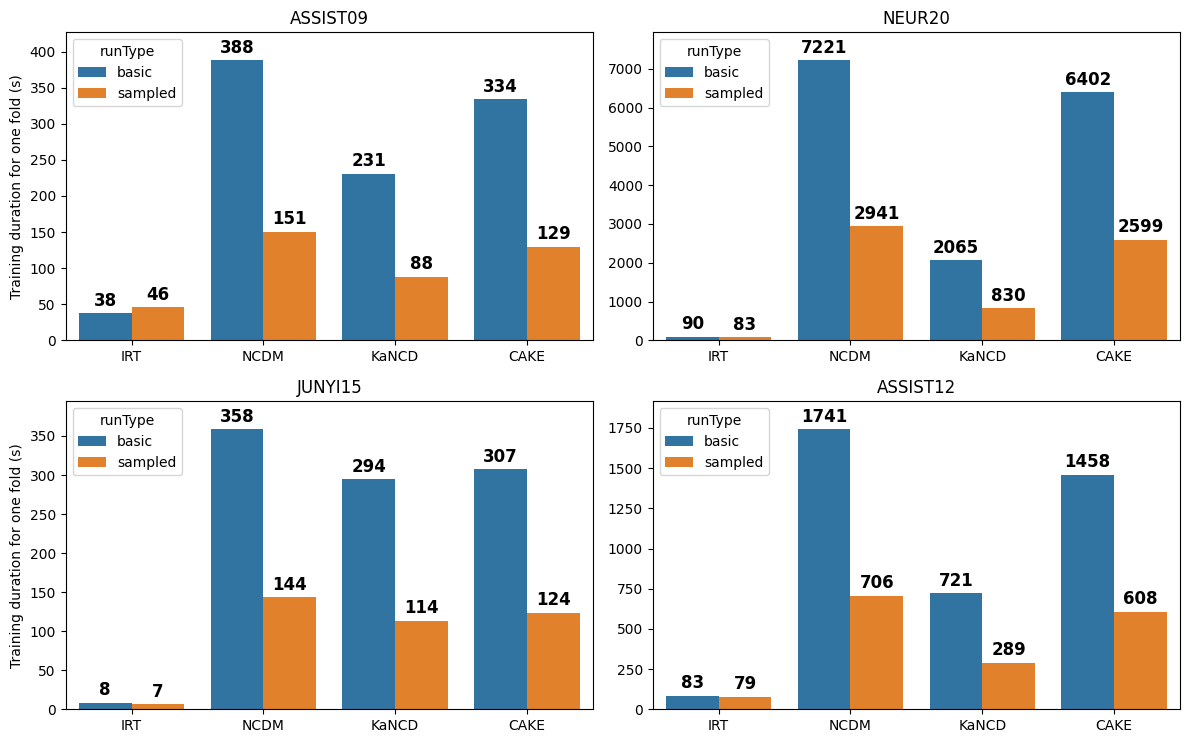

In [24]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

for i, dataset in enumerate(all_datasets):
    gdf = df.loc[(df['dataset'] == dataset) & (df['runType'].isin(['basic','sampled']))].copy()
    gdf['runType'] = pd.Categorical(gdf['runType'], categories=['basic','sampled'], ordered=True)
    sns.barplot(
        x='model',
        y='avg_train_duration', 
        hue='runType',
        ax=axes[i],
        data=gdf
    )
    axes[i].set_title(dataset)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel('Training duration for one fold (s)')
    axes[i].set_xlabel('')

    for p in axes[i].patches[:-2]:
        axes[i].annotate(f'{p.get_height():.0f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
    axes[i].set_ylim(0,max(gdf['avg_train_duration'])*1.1)
    
plt.suptitle('')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/time_improvement_by_model.png',dpi=300, bbox_inches='tight')
plt.show()

#conclusion: sampling has little effect on IRT but roughly linear decrease for neurals


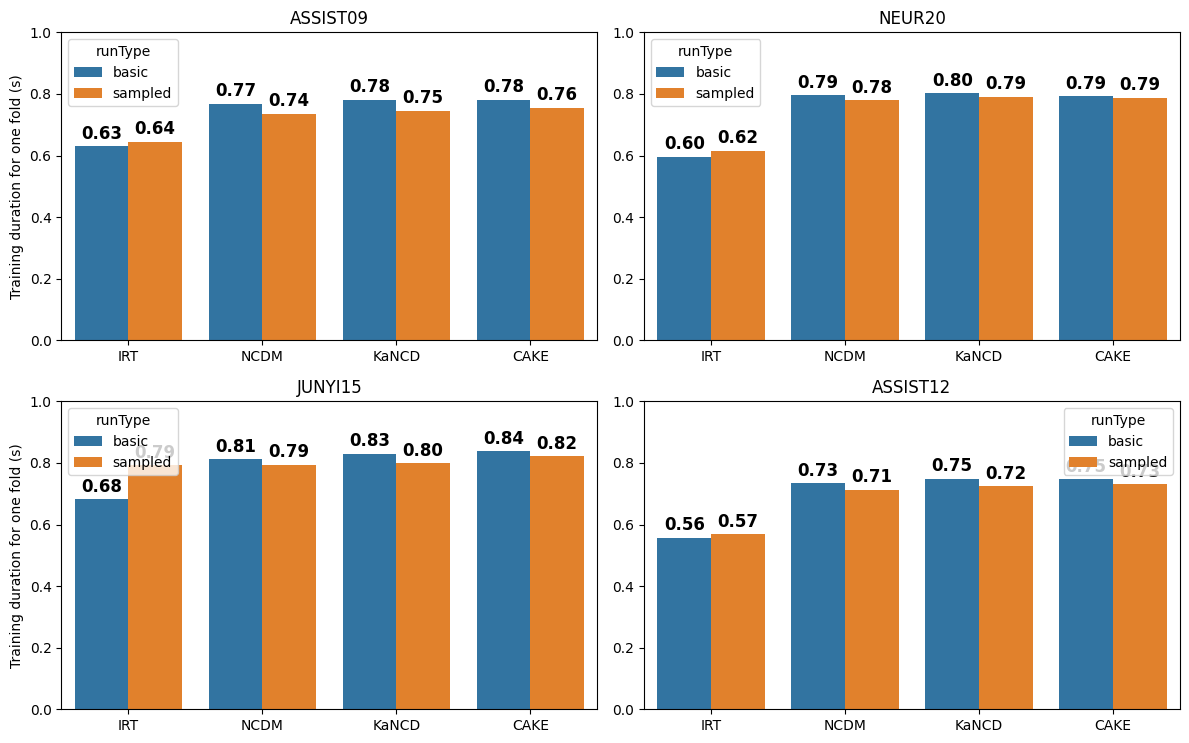

In [6]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

for i, dataset in enumerate(all_datasets):
    gdf = df.loc[(df['dataset'] == dataset) & (df['runType'].isin(['basic','sampled']))].copy()
    gdf['runType'] = pd.Categorical(gdf['runType'], categories=['basic','sampled'], ordered=True)
    sns.barplot(
        x='model',
        y='AUC', 
        hue='runType',
        ax=axes[i],
        data=gdf
    )
    axes[i].set_title(dataset)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel('Training duration for one fold (s)')
    axes[i].set_xlabel('')

    axes[i].set_ylim(0,1)

    for p in axes[i].patches[:-2]:
        axes[i].annotate(f'{p.get_height():.2f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
        
plt.suptitle('')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/sampled_AUC_change_by_model.png',dpi=300, bbox_inches='tight')
plt.show()

#conclusion: sampling has little effect on IRT but roughly linear decrease for neurals


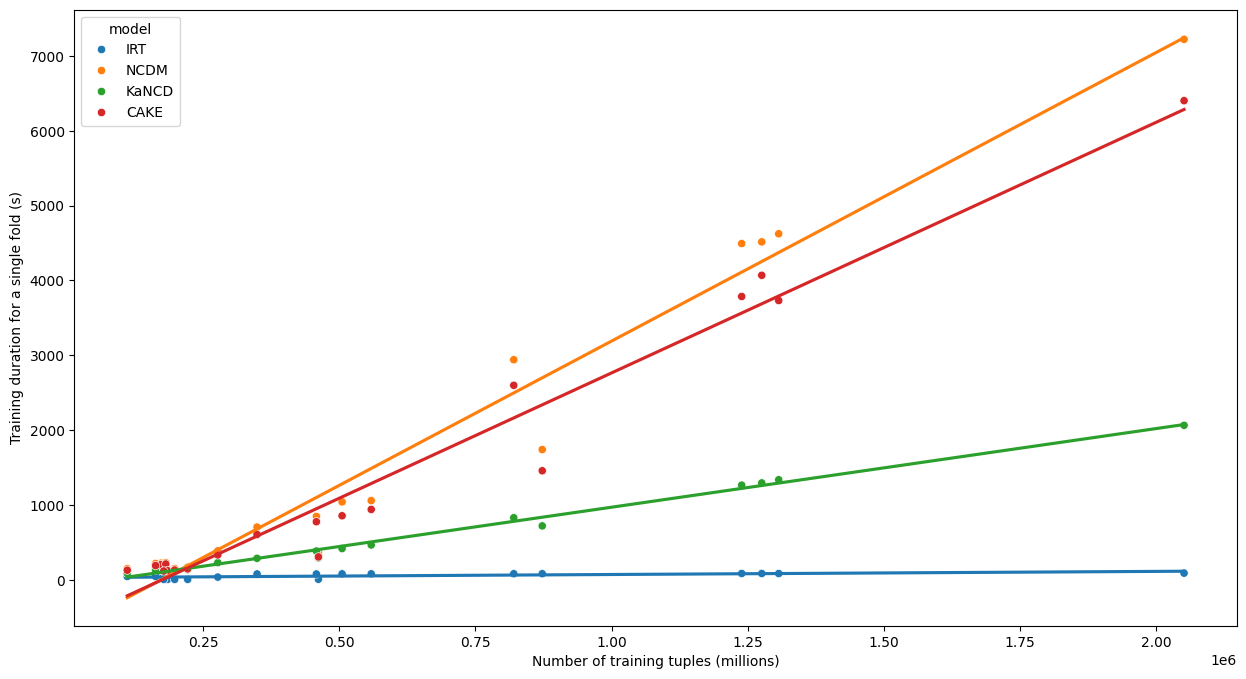

In [7]:
fig, axes = plt.subplots(1,1, figsize=(15,8))

sns.scatterplot(x = 'n_train_examples', y='avg_train_duration', hue='model', ax = axes, data=df)



for model in df['model'].unique():
    model_df = df[df['model'] == model]
    sns.regplot(
        x='n_train_examples',
        y='avg_train_duration',
        data=model_df,
        ax=axes,
        scatter=False,  # Do not plot the scatter points again
        label=f'{model} trend',  # Optionally label the lines
        ci=None  # Disable confidence interval shading if not needed
    )
axes.set_title('')
axes.set_xlabel('Number of training tuples (millions)')
axes.set_ylabel('Training duration for a single fold (s)')
plt.savefig('graphics/time_vs_samples_by_model.png', dpi=300, bbox_inches='tight')

plt.show()

In [8]:
for dataset in all_datasets:
    print("&\\multicolumn{4}{c}{" + dataset + "}\\\\ \\hline")
    print("Model&Accuracy&AUC&MAE&RMSE  \\\\ \\hline")
    gdf = df[(df['runType']=='basic') & (df['dataset'] == dataset)]
    modelStrs = ["IRT", "NCDM", "KaNCD", "CAKE"]
    for stat in ['ACC', 'AUC', 'MAE', 'RMSE']:
        for i,m in enumerate(modelStrs):
            modelStrs[i] += "&"
        stats = []
        stds = []
        for model in all_models:
            stats.append(gdf[gdf['model'] == model][stat].iloc[0])
            stds.append(gdf[gdf['model'] == model][stat + '_std'].iloc[0])

        best_stat = max(stats) if stat in ['ACC', 'AUC'] else min(stats)
        
        for i,s in enumerate(stats):
            if s == best_stat:
                modelStrs[i] += ("\\textbf{%.3f}$\\pm$%.3f" % (s, stds[i]))
            else:
                modelStrs[i] += ("%.3f$\\pm$%.3f" % (s, stds[i]))
    for line in modelStrs:
        print(line + "\\\\")

&\multicolumn{4}{c}{ASSIST09}\\ \hline
Model&Accuracy&AUC&MAE&RMSE  \\ \hline
IRT&0.633$\pm$0.003&0.629$\pm$0.003&0.410$\pm$0.001&0.491$\pm$0.001\\
NCDM&0.721$\pm$0.003&0.768$\pm$0.002&0.351$\pm$0.007&0.434$\pm$0.002\\
KaNCD&0.727$\pm$0.002&0.782$\pm$0.001&\textbf{0.338}$\pm$0.005&0.430$\pm$0.002\\
CAKE&\textbf{0.731}$\pm$0.002&\textbf{0.782}$\pm$0.001&0.355$\pm$0.004&\textbf{0.425}$\pm$0.001\\
&\multicolumn{4}{c}{NEUR20}\\ \hline
Model&Accuracy&AUC&MAE&RMSE  \\ \hline
IRT&0.613$\pm$0.002&0.596$\pm$0.019&0.414$\pm$0.002&0.518$\pm$0.007\\
NCDM&0.731$\pm$0.002&0.795$\pm$0.001&\textbf{0.341}$\pm$0.004&0.423$\pm$0.001\\
KaNCD&\textbf{0.738}$\pm$0.002&\textbf{0.803}$\pm$0.002&0.344$\pm$0.013&\textbf{0.420}$\pm$0.002\\
CAKE&0.731$\pm$0.001&0.793$\pm$0.002&0.360$\pm$0.006&0.423$\pm$0.001\\
&\multicolumn{4}{c}{JUNYI15}\\ \hline
Model&Accuracy&AUC&MAE&RMSE  \\ \hline
IRT&0.773$\pm$0.004&0.683$\pm$0.007&0.290$\pm$0.002&0.406$\pm$0.003\\
NCDM&0.818$\pm$0.004&0.812$\pm$0.003&0.235$\pm$0.005&0.363$

In [9]:
all_stats = ['ACC', 'AUC', 'MAE', 'RMSE']

In [10]:
#calculate change in each stat between basic and sampled runs and save to column
newdf = pd.DataFrame(columns=['model','ACC_dif','AUC_dif','MAE_dif','RMSE_dif'])

def calculate_improvement(group, stat):
        basic = group.loc[group['runType'] == 'basic', stat].values[0]
        sampled = group.loc[group['runType'] == 'sampled', stat].values[0]
    
        change = sampled - basic
    
        group[stat + '_change'] = change
    
        return group

for model in all_models:
    mdf = df[df['model'] == model]
    obj = {'model':model,
            'ACC_dif':0,
            'AUC_dif':0,
            'MAE_dif':0,
            'RMSE_dif':0}
    for stat in all_stats:
        basic = mdf[mdf['runType'] == 'basic'][stat]
        samp = mdf[mdf['runType'] == 'sampled'][stat]
        
        change = samp.mean()-basic.mean()

        obj[stat+'_dif'] = change
        
    newdf.loc[len(newdf)] = obj.values()

newdf
    

,model,ACC_dif,AUC_dif,MAE_dif,RMSE_dif
0,IRT,0.012816,0.039345,-0.009983,-0.015089
1,NCDM,-0.016851,-0.022027,0.015698,0.010780
2,KaNCD,-0.016829,-0.025930,0.009090,0.013103
3,CAKE,-0.008761,-0.015948,0.004074,0.007420


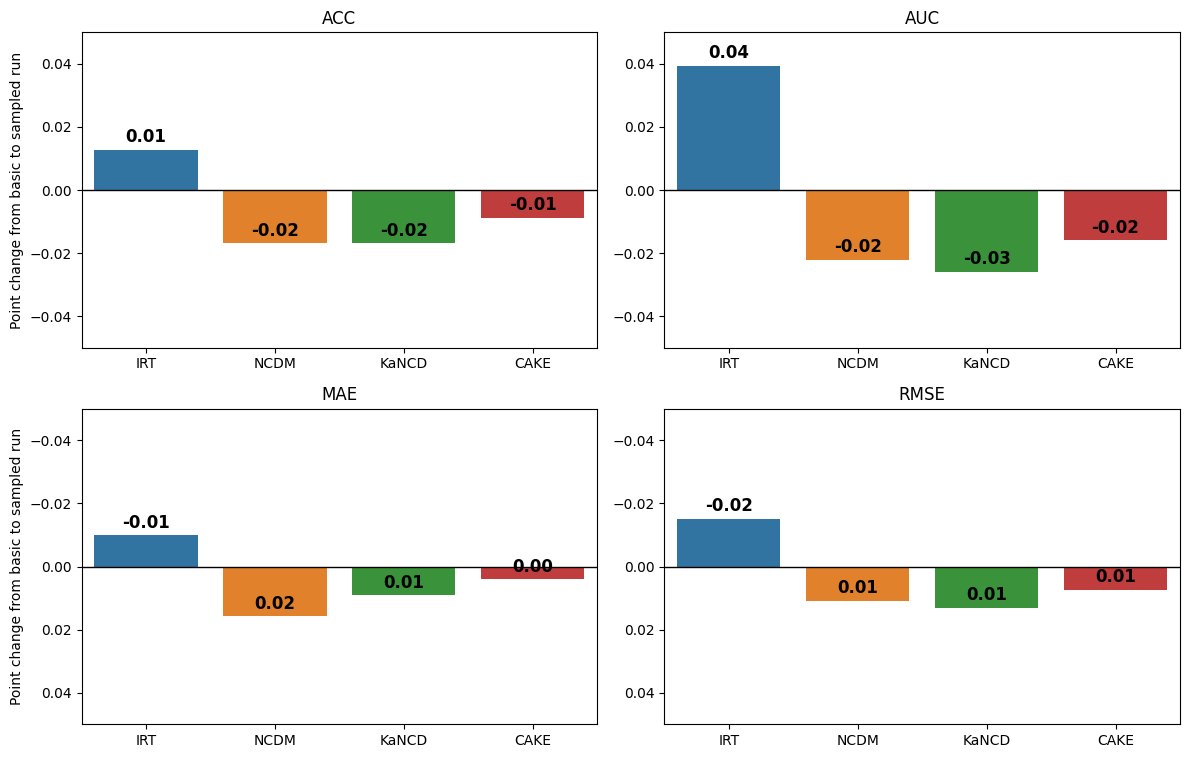

In [11]:
#bar chart of performance changes calculated above
#new chart for each metric

fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

stat_difs = []

for s in all_stats:
    stat_difs.append(s+'_dif')

for i, stat in enumerate(all_stats):
    sns.barplot(
        x='model',
        y=stat+'_dif',
        ax=axes[i],
        data=newdf,
        hue='model'
    )
    axes[i].set_title(stat)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel('Point change from basic to sampled run')
    axes[i].set_xlabel('')
    #invert y for RMSE and MAE
    axes[i].set_ylim(-0.05, 0.05)
    axes[i].axhline(0, color='black', linewidth=1)
    if(i > 1):
        axes[i].invert_yaxis()

        

    #show values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/basic_vs_sampled_performance.png',dpi=300, bbox_inches='tight')
plt.show()

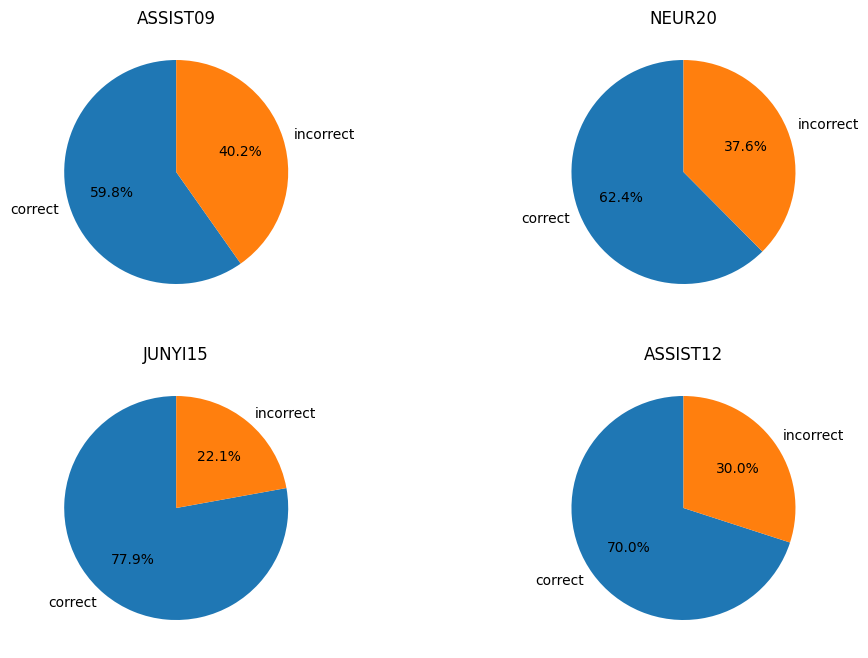

In [12]:
#Graph Train and test ratios in Even/undersampled splits
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()
labels = ['correct', 'incorrect']

for i,data in enumerate(all_datasets):
    rdf = df[(df['runType'] == 'basic') & (df['dataset'] == data)]
    train_ratio = rdf['train_correct_ratio'].mean()
    test_ratio = rdf['test_correct_ratio'].mean()
    n_train = rdf['n_train_examples'].mean()
    n_test = rdf['n_test_examples'].mean()
    ratio = ((train_ratio * n_train) + test_ratio * n_test)/(n_train+n_test)
    axes[i].pie([ratio, 1-ratio], labels=labels, startangle=90,autopct='%1.1f%%')
    axes[i].set_title(data)
plt.savefig("graphics/basic_correct_ratios.png", dpi=300, bbox_inches='tight')
plt.show()

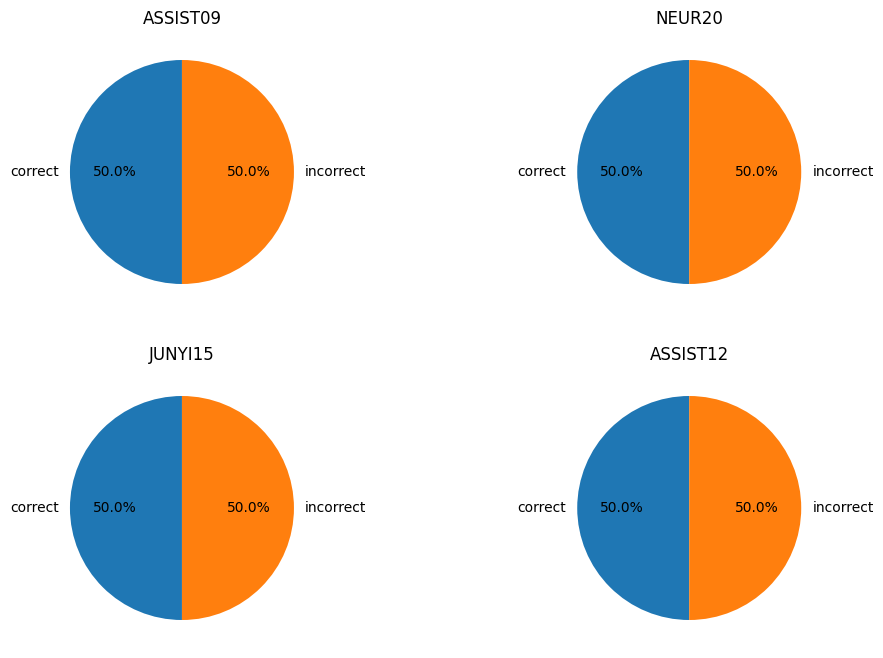

In [13]:
#Graph Train and test ratios in Even/undersampled splits
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()
labels = ['correct', 'incorrect']

for i,data in enumerate(all_datasets):
    rdf = df[(df['runType'] == 'undersampleEven') & (df['dataset'] == data)]
    train_ratio = rdf['train_correct_ratio'].mean()
    test_ratio = rdf['test_correct_ratio'].mean()
    n_train = rdf['n_train_examples'].mean()
    n_test = rdf['n_test_examples'].mean()
    ratio = ((train_ratio * n_train) + test_ratio * n_test)/(n_train+n_test)
    axes[i].pie([ratio, 1-ratio], labels=labels, startangle=90,autopct='%1.1f%%')
    axes[i].set_title(data)
plt.savefig("graphics/equal_correct_ratios.png", dpi=300, bbox_inches='tight')
plt.show()

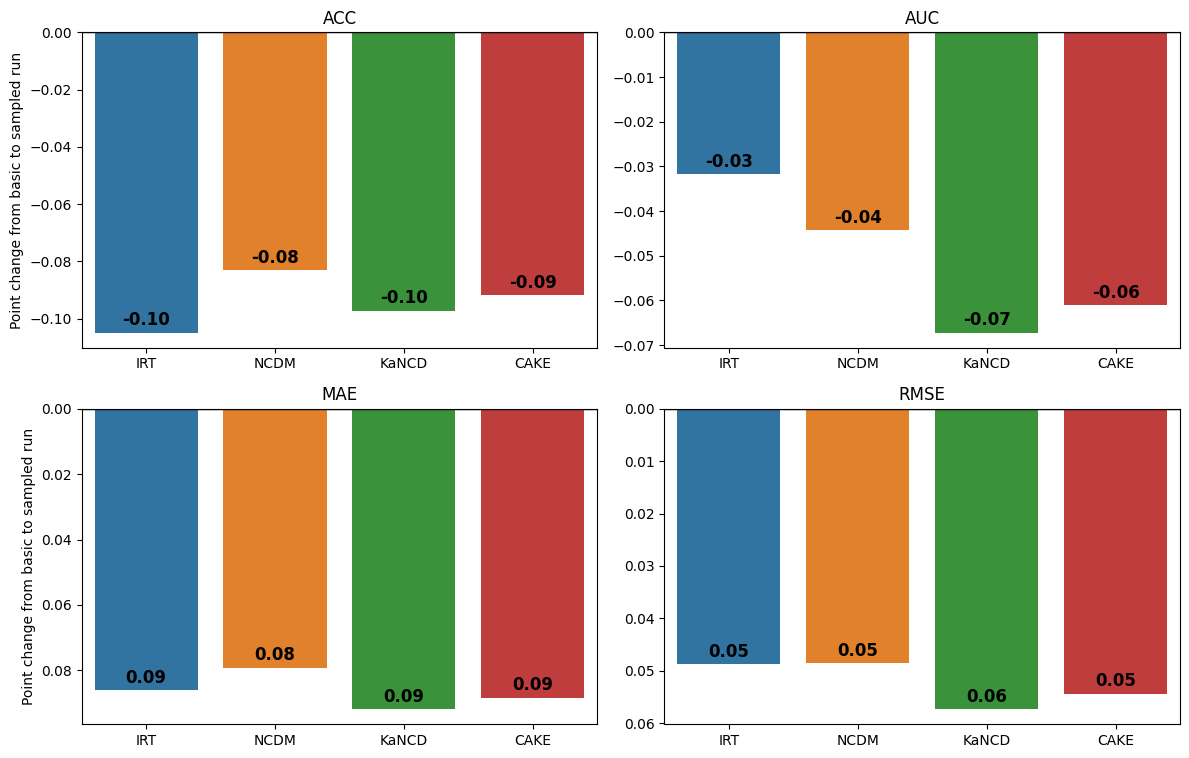

In [14]:
#bar chart of performance changes calculated above
#new chart for each metric
#calculate change in each stat between basic and evem runs and save to column
newdf_e = pd.DataFrame(columns=['model','ACC_dif','AUC_dif','MAE_dif','RMSE_dif'])

def calculate_improvement(group, stat):
        basic = group.loc[group['runType'] == 'basic', stat].values[0]
        sampled = group.loc[group['runType'] == 'undersampleEven', stat].values[0]
    
        change = sampled - basic
    
        group[stat + '_change'] = change
    
        return group

for model in all_models:
    mdf = df[df['model'] == model]
    obj = {'model':model,
            'ACC_dif':0,
            'AUC_dif':0,
            'MAE_dif':0,
            'RMSE_dif':0}
    for stat in all_stats:
        basic = mdf[mdf['runType'] == 'basic'][stat]
        samp = mdf[mdf['runType'] == 'undersampleEven'][stat]
        
        change = samp.mean()-basic.mean()

        obj[stat+'_dif'] = change
        
    newdf_e.loc[len(newdf_e)] = obj.values()

fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

stat_difs = []

for s in all_stats:
    stat_difs.append(s+'_dif')

for i, stat in enumerate(all_stats):
    sns.barplot(
        x='model',
        y=stat+'_dif',
        ax=axes[i],
        data=newdf_e,
        hue='model'
    )
    axes[i].set_title(stat)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel('Point change from basic to sampled run')
    axes[i].set_xlabel('')
    #invert y for RMSE and MAE
    #axes[i].set_ylim(-0.05, 0.05)
    axes[i].axhline(0, color='black', linewidth=1)
    if(i > 1):
        axes[i].invert_yaxis()

        

    #show values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/basic_vs_equal_performance.png',dpi=300, bbox_inches='tight')
plt.show()

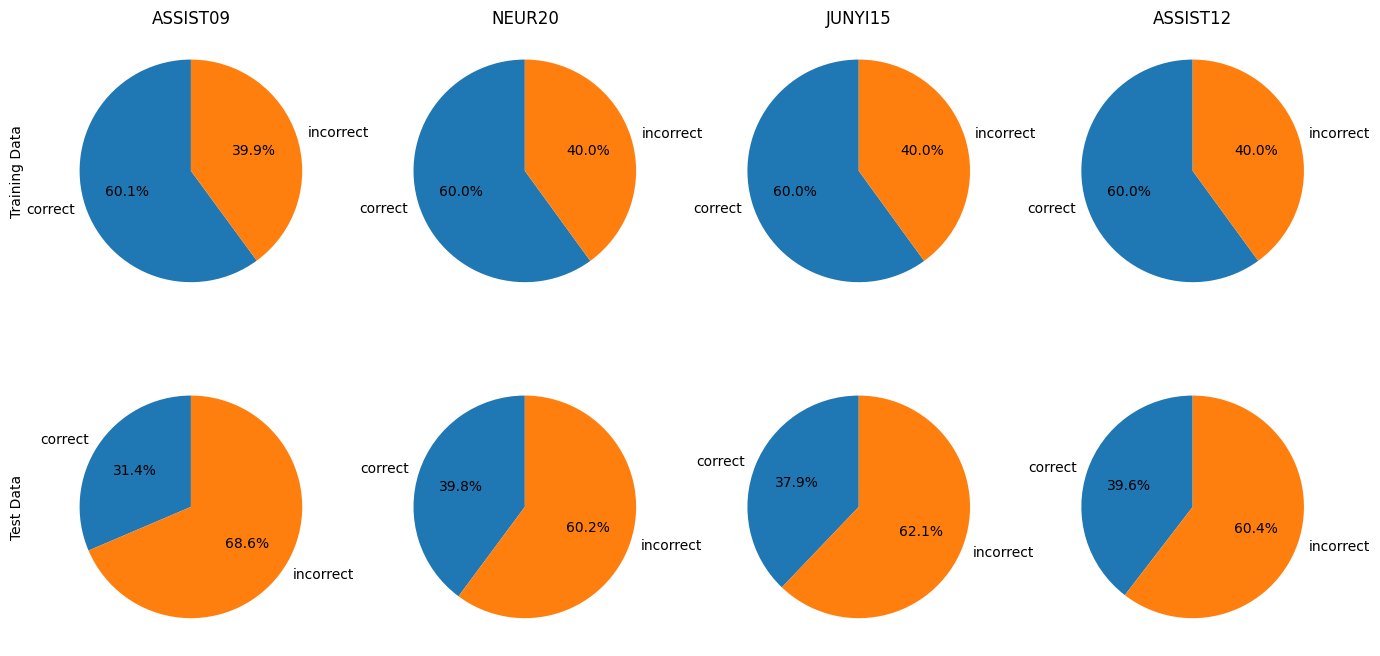

In [15]:
#Graph Train and test ratios in Even/undersampled splits
fig, axes = plt.subplots(2,4, figsize=(32,8))
axes = axes.flatten()
labels = ['correct', 'incorrect']

for i,data in enumerate(all_datasets):
    rdf = df[(df['runType'] == 'undersampleCorrect') & (df['dataset'] == data)]
    train_ratio = rdf['train_correct_ratio'].mean()
    test_ratio = rdf['test_correct_ratio'].mean()
    axes[i].pie([train_ratio, 1-train_ratio], labels=labels, startangle=90,autopct='%1.1f%%')
    axes[i+4].pie([test_ratio, 1-test_ratio], labels=labels, startangle=90,autopct='%1.1f%%')
    axes[i].set_title(data)

axes[0].set_ylabel('Training Data', labelpad=20)
axes[4].set_ylabel('Test Data', labelpad=20)
plt.subplots_adjust(left=0.5)
plt.savefig('graphics/correct_correct_ratios.png', dpi=300, bbox_inches='tight')
plt.show()

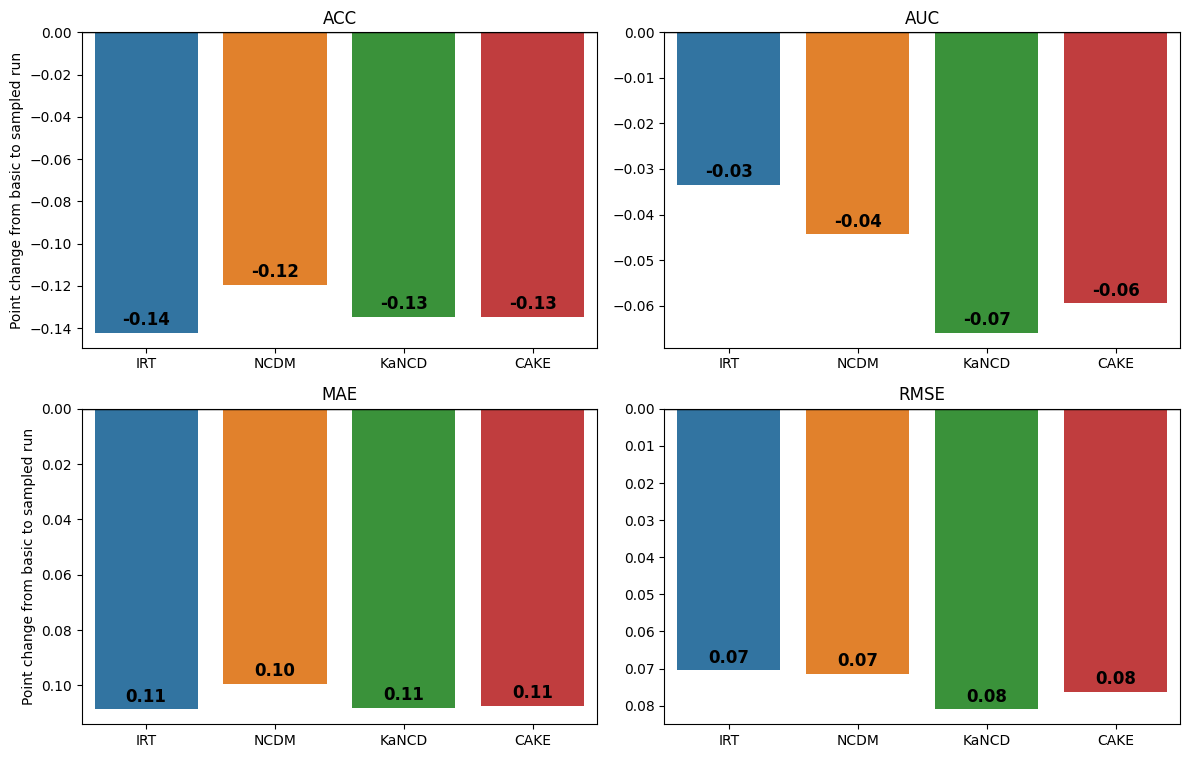

In [16]:
#bar chart of performance changes calculated above
#new chart for each metric
#calculate change in each stat between basic and evem runs and save to column
newdf_e = pd.DataFrame(columns=['model','ACC_dif','AUC_dif','MAE_dif','RMSE_dif'])

for model in all_models:
    mdf = df[df['model'] == model]
    obj = {'model':model,
            'ACC_dif':0,
            'AUC_dif':0,
            'MAE_dif':0,
            'RMSE_dif':0}
    for stat in all_stats:
        basic = mdf[mdf['runType'] == 'basic'][stat]
        samp = mdf[mdf['runType'] == 'undersampleCorrect'][stat]
        
        change = samp.mean()-basic.mean()

        obj[stat+'_dif'] = change
        
    newdf_e.loc[len(newdf_e)] = obj.values()

fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

stat_difs = []

for s in all_stats:
    stat_difs.append(s+'_dif')

for i, stat in enumerate(all_stats):
    sns.barplot(
        x='model',
        y=stat+'_dif',
        ax=axes[i],
        data=newdf_e,
        hue='model'
    )
    axes[i].set_title(stat)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel('Point change from basic to sampled run')
    axes[i].set_xlabel('')
    #invert y for RMSE and MAE
    #axes[i].set_ylim(-0.05, 0.05)
    axes[i].axhline(0, color='black', linewidth=1)
    if(i > 1):
        axes[i].invert_yaxis()

        

    #show values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/basic_vs_correct_performance.png',dpi=300, bbox_inches='tight')
plt.show()

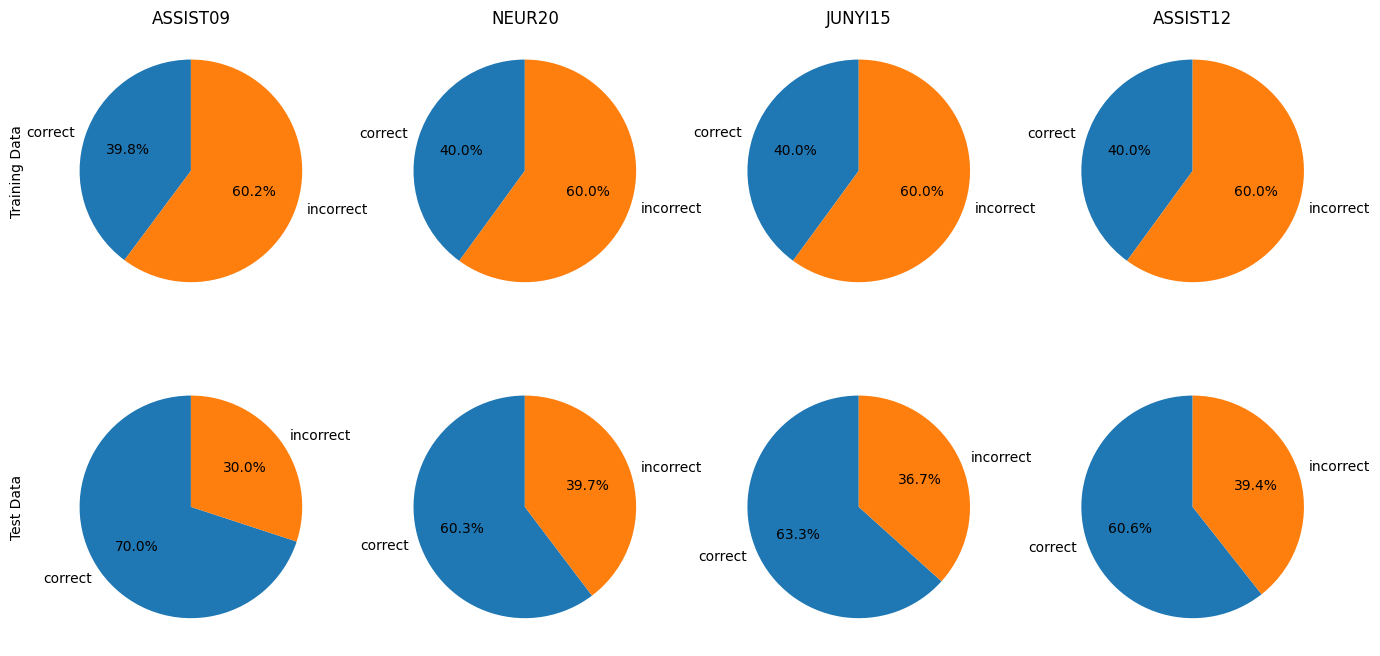

In [17]:
#Graph Train and test ratios in Even/undersampled splits
fig, axes = plt.subplots(2,4, figsize=(32,8))
axes = axes.flatten()
labels = ['correct', 'incorrect']

for i,data in enumerate(all_datasets):
    rdf = df[(df['runType'] == 'undersampleIncorrect') & (df['dataset'] == data)]
    train_ratio = rdf['train_correct_ratio'].mean()
    test_ratio = rdf['test_correct_ratio'].mean()
    axes[i].pie([train_ratio, 1-train_ratio], labels=labels, startangle=90,autopct='%1.1f%%')
    axes[i+4].pie([test_ratio, 1-test_ratio], labels=labels, startangle=90,autopct='%1.1f%%')
    axes[i].set_title(data)

axes[0].set_ylabel('Training Data', labelpad=20)
axes[4].set_ylabel('Test Data', labelpad=20)
plt.subplots_adjust(left=0.5)
plt.savefig('graphics/incorrect_correct_ratios.png', dpi=300, bbox_inches='tight')
plt.show()

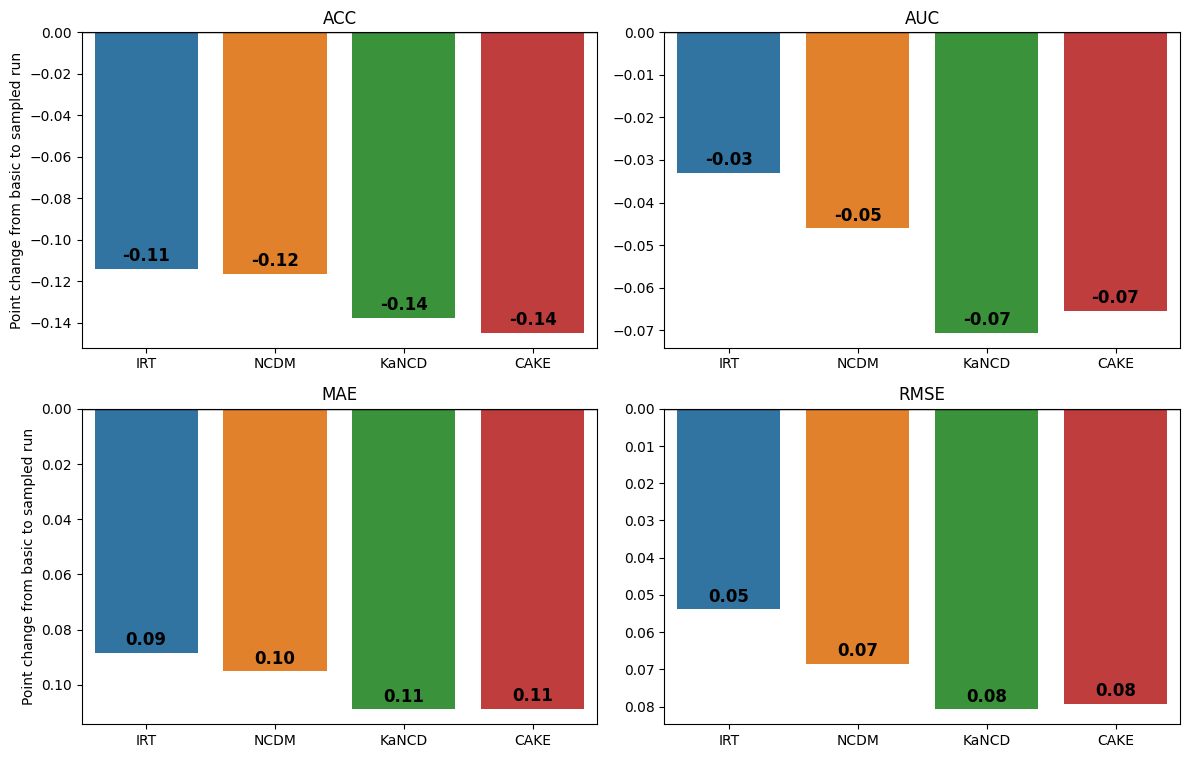

In [18]:
#bar chart of performance changes calculated above
#new chart for each metric
#calculate change in each stat between basic and evem runs and save to column
newdf_e = pd.DataFrame(columns=['model','ACC_dif','AUC_dif','MAE_dif','RMSE_dif'])

for model in all_models:
    mdf = df[df['model'] == model]
    obj = {'model':model,
            'ACC_dif':0,
            'AUC_dif':0,
            'MAE_dif':0,
            'RMSE_dif':0}
    for stat in all_stats:
        basic = mdf[mdf['runType'] == 'basic'][stat]
        samp = mdf[mdf['runType'] == 'undersampleIncorrect'][stat]
        
        change = samp.mean()-basic.mean()

        obj[stat+'_dif'] = change
        
    newdf_e.loc[len(newdf_e)] = obj.values()

fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

stat_difs = []

for s in all_stats:
    stat_difs.append(s+'_dif')

for i, stat in enumerate(all_stats):
    sns.barplot(
        x='model',
        y=stat+'_dif',
        ax=axes[i],
        data=newdf_e,
        hue='model'
    )
    axes[i].set_title(stat)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel('Point change from basic to sampled run')
    axes[i].set_xlabel('')
    #invert y for RMSE and MAE
    #axes[i].set_ylim(-0.05, 0.05)
    axes[i].axhline(0, color='black', linewidth=1)
    if(i > 1):
        axes[i].invert_yaxis()

        

    #show values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/basic_vs_incorrect_performance.png',dpi=300, bbox_inches='tight')
plt.show()

In [19]:
idf = df[df['runType'].isin(['basic','undersampleIncorrect'])] 
idf[['model','dataset','AUC','ACC','RMSE','MAE','n_train_examples','runType']]

,model,dataset,AUC,ACC,RMSE,MAE,n_train_examples,runType
0,IRT,ASSIST09,0.629398,0.633016,0.490914,0.409896,277020.8,basic
31,IRT,ASSIST09,0.566759,0.536950,0.532814,0.477960,162832.0,undersampleIncorrect
7,IRT,NEUR20,0.596081,0.613311,0.518404,0.413534,2050977.6,basic
34,IRT,NEUR20,0.501338,0.510667,0.567031,0.489755,1238824.0,undersampleIncorrect
11,IRT,JUNYI15,0.682724,0.772999,0.406123,0.290235,461746.4,basic
37,IRT,JUNYI15,0.755819,0.651339,0.466531,0.402206,177759.0,undersampleIncorrect
15,IRT,ASSIST12,0.556846,0.647326,0.494746,0.394281,872659.2,basic
40,IRT,ASSIST12,0.509004,0.511943,0.559016,0.491409,457974.0,undersampleIncorrect
2,NCDM,ASSIST09,0.767928,0.721406,0.433529,0.351221,277020.8,basic
43,NCDM,ASSIST09,0.721947,0.628529,0.485734,0.419202,162832.0,undersampleIncorrect


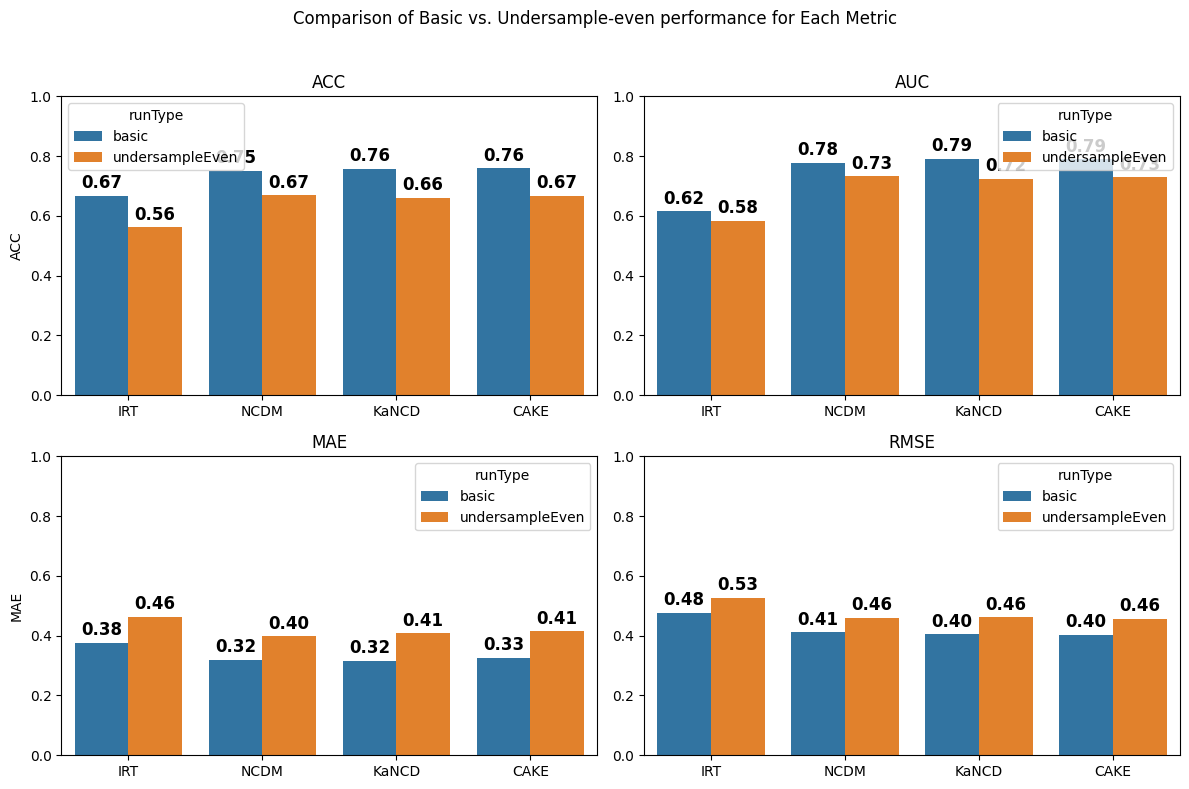

In [20]:
#create a graph to compare running time by dataset
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

compRT = 'undersampleEven'

pdf = df[['model', 'runType', 'dataset', 'AUC', 'ACC', 'MAE', 'RMSE']]
pdf = pdf[pdf['runType'].isin(['basic',compRT])]


for i, stat in enumerate(all_stats):
    gdf = pdf.groupby(['model','runType'])[stat].mean().reset_index()
    gdf['runType'] = pd.Categorical(gdf['runType'], categories=['basic',compRT], ordered=True)
    sns.barplot(
        x='model',
        y=stat, 
        hue='runType',
        ax=axes[i],
        data=gdf
    )
    axes[i].set_title(stat)
    axes[i].set_ylim(0,1)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel(stat)
    axes[i].set_xlabel('')

    for p in axes[i].patches[:-2]:
        axes[i].annotate(f'{p.get_height():.2f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
        
plt.suptitle('Comparison of Basic vs. Undersample-even performance for Each Metric')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/basic_even_performance.png',dpi=300, bbox_inches='tight')
plt.show()



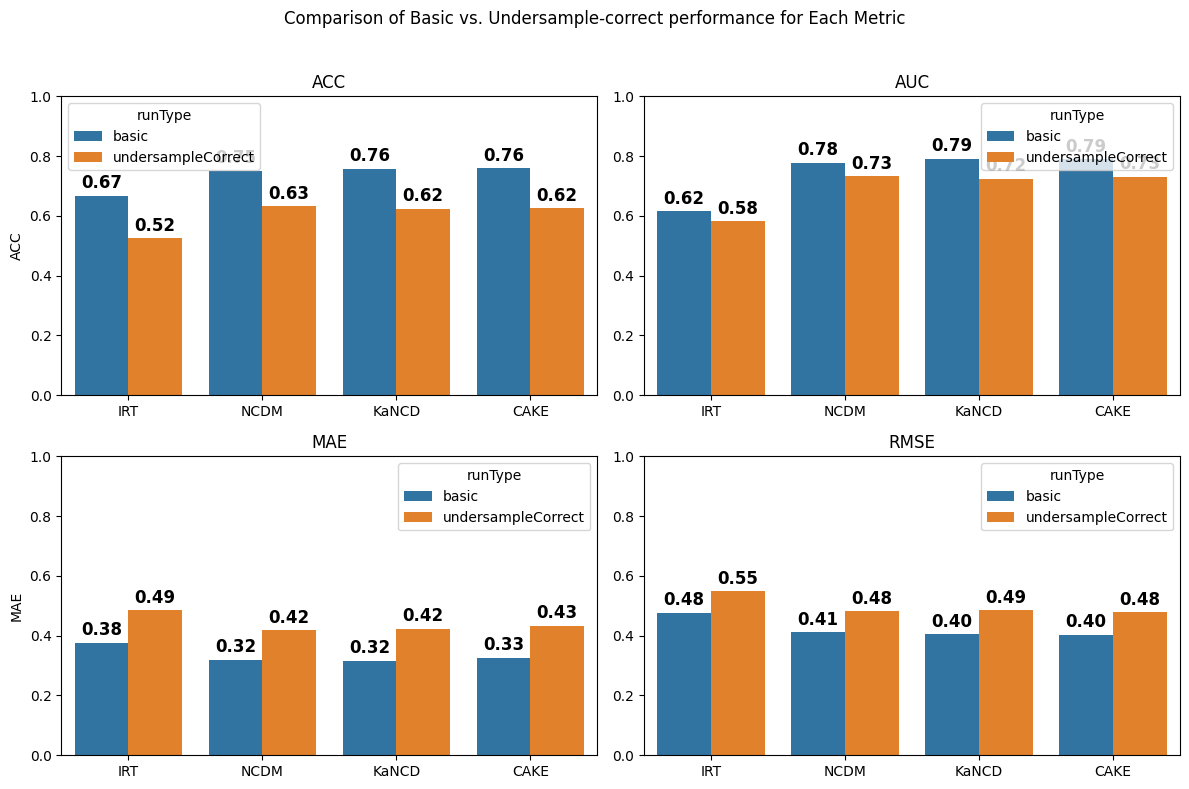

In [21]:
#create a graph to compare running time by dataset
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

compRT = 'undersampleCorrect'

pdf = df[['model', 'runType', 'dataset', 'AUC', 'ACC', 'MAE', 'RMSE']]
pdf = pdf[pdf['runType'].isin(['basic',compRT])]


for i, stat in enumerate(all_stats):
    gdf = pdf.groupby(['model','runType'])[stat].mean().reset_index()
    gdf['runType'] = pd.Categorical(gdf['runType'], categories=['basic',compRT], ordered=True)
    sns.barplot(
        x='model',
        y=stat, 
        hue='runType',
        ax=axes[i],
        data=gdf
    )
    axes[i].set_title(stat)
    axes[i].set_ylim(0,1)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel(stat)
    axes[i].set_xlabel('')

    for p in axes[i].patches[:-2]:
        axes[i].annotate(f'{p.get_height():.2f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
        
plt.suptitle('Comparison of Basic vs. Undersample-correct performance for Each Metric')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/basic_correct_performance.png',dpi=300, bbox_inches='tight')
plt.show()



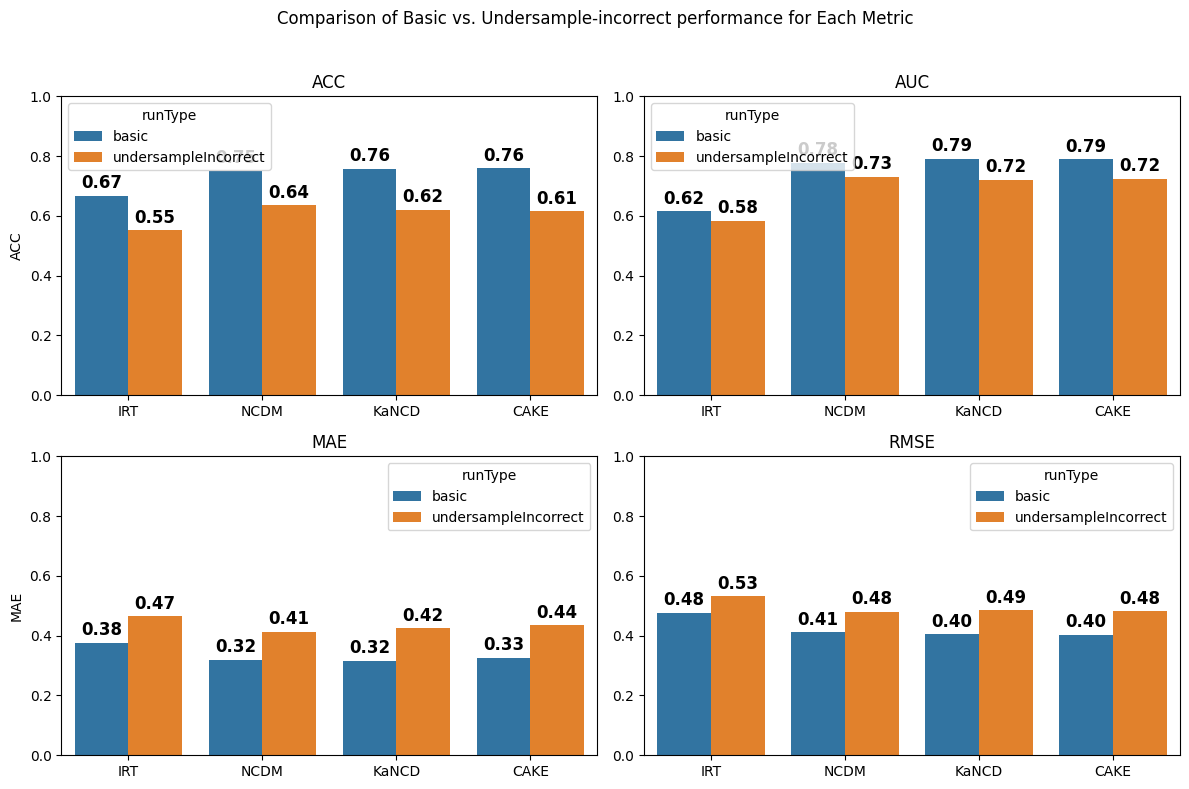

In [22]:
#create a graph to compare running time by dataset
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()

compRT = 'undersampleIncorrect'

pdf = df[['model', 'runType', 'dataset', 'AUC', 'ACC', 'MAE', 'RMSE']]
pdf = pdf[pdf['runType'].isin(['basic',compRT])]


for i, stat in enumerate(all_stats):
    gdf = pdf.groupby(['model','runType'])[stat].mean().reset_index()
    gdf['runType'] = pd.Categorical(gdf['runType'], categories=['basic',compRT], ordered=True)
    sns.barplot(
        x='model',
        y=stat, 
        hue='runType',
        ax=axes[i],
        data=gdf
    )
    axes[i].set_title(stat)
    axes[i].set_ylim(0,1)
    if(i % 2 == 1):
        axes[i].set_ylabel('')
    else:
        axes[i].set_ylabel(stat)
    axes[i].set_xlabel('')

    for p in axes[i].patches[:-2]:
        axes[i].annotate(f'{p.get_height():.2f}',   # Value to show (formatted to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the top of the bar
                ha='center', va='center', 
                xytext=(0, 9),  # Slightly above the bar
                textcoords='offset points',
                fontsize=12, color='black', weight='bold')
        
plt.suptitle('Comparison of Basic vs. Undersample-incorrect performance for Each Metric')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('graphics/basic_incorrect_performance.png',dpi=300, bbox_inches='tight')
plt.show()


In [43]:
#find average train time per tuple for dataset-model pairs
df.columns

ttdf = df[['model', 'dataset','runType', 'n_train_examples', 'avg_train_duration']].copy()

ttdf['tuple_per_second'] = ttdf['n_train_examples'] / ttdf['avg_train_duration']
for model in all_models:
    ttsdf = ttdf[ttdf['model'] == model]
    #print(ttsdf[['model','dataset', 'runType','tuple_per_second']],"\n")
    for data in all_datasets:
        sdf = ttsdf[ttsdf['dataset'] == data]
        print(model, data, sdf['tuple_per_second'].mean(), sdf['tuple_per_second'].std())

#NERU20 has best train time per tuple so it may be getting more efficient


IRT ASSIST09 4120.041187727643 1879.0419789921468
IRT NEUR20 15451.363834608046 4581.791683418017
IRT JUNYI15 34727.21379364718 12081.165185719166
IRT ASSIST12 6756.099434976166 2287.6229588871975
NCDM ASSIST09 750.1110532612092 29.580708080832466
NCDM NEUR20 280.74836380088516 3.3981714025590244
NCDM JUNYI15 1296.8036356441958 8.856116996070618
NCDM ASSIST12 509.67659479444717 23.3562965982119
KaNCD ASSIST09 1245.193392752936 25.0750632730929
KaNCD NEUR20 984.1931948219093 6.783461374754632
KaNCD JUNYI15 1614.8909472211217 26.32447734067995
KaNCD ASSIST12 1202.0761870376098 9.79781534192105
CAKE ASSIST09 849.2197858623201 11.386845909326617
CAKE NEUR20 325.3759188742397 14.837061908918045
CAKE JUNYI15 1498.371697943498 3.018715921758245
CAKE ASSIST12 589.0573646079714 8.938444125099231


In [44]:
#Find average train time overall

for model in all_models:
    mdf = df[(df['model'] == model) & (df['runType'] == 'basic')]
    print(model, mdf['avg_train_duration'].mean())

IRT 54.84820204973221
NCDM 2427.2811228871346
KaNCD 827.8829232096672
CAKE 2125.3157700896263
